Nome: Felipe Bortolletto
Professor: Prof. Anderson Ara
Disciplina: TEORIA DO APRENDIZADO ESTAT ́ISTICO
Data: 26 de abril de 2024


#Enunciado da Atividade

Exercício 2: Escolha um conjunto de dados de seu interesse para uma tarefa de predição. Faça uma comparação entre
SVM e Redes Neurais. Crie uma análise com Introdução, Metodologia, Resultados e Comentários Finais de até 8 páginas.

Iniciaremos importando os dados e criando familiaridade com eles

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

y.replace({"M":0,"B":1},inplace = True)

<ipython-input-3-d7f557f3108b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({"M":0,"B":1},inplace = True)


In [4]:
breast = pd.DataFrame(data=X, columns=breast_cancer_wisconsin_diagnostic.feature_names)
breast['target'] = y

In [5]:
breast.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'target'],
      dtype='object')

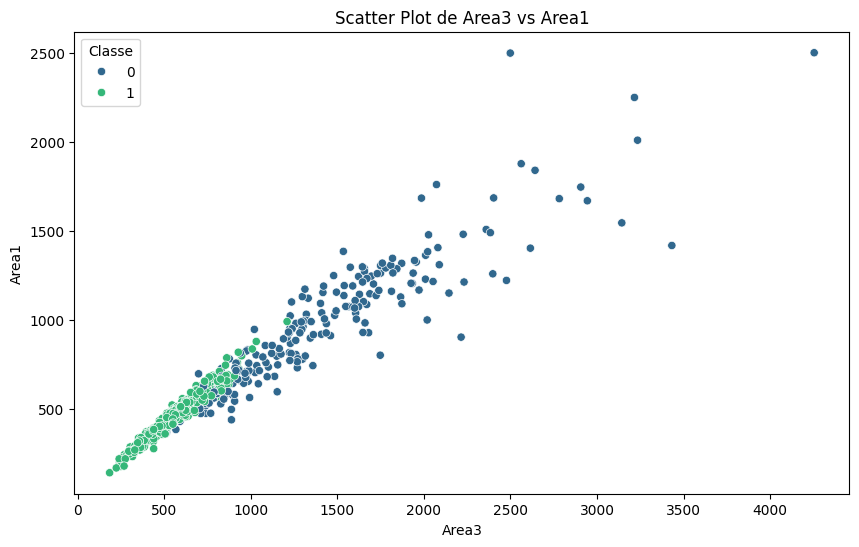

In [6]:
x_column = 'area3'
y_column = 'area1'

# Plotar o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=breast[x_column], y=breast[y_column], hue=breast['target'], palette='viridis')
plt.title(f'Scatter Plot de {x_column.capitalize()} vs {y_column.capitalize()}')
plt.xlabel(x_column.capitalize())
plt.ylabel(y_column.capitalize())
plt.legend(title='Classe')
plt.show()

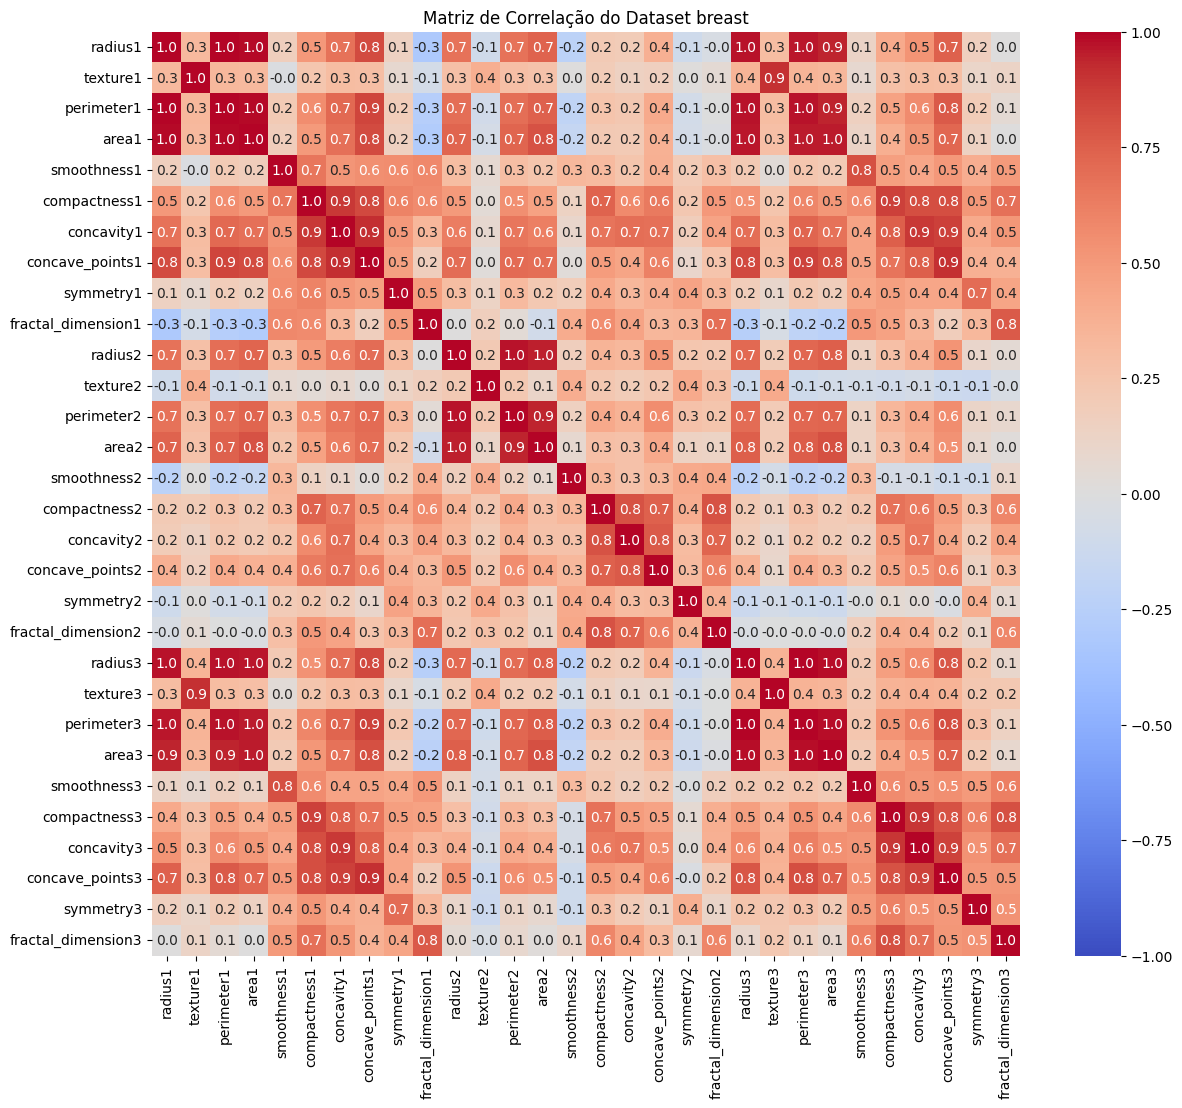

In [21]:
# Plotar a matriz de correlação

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = breast.drop(columns = ["target"]).corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação do Dataset breast')
plt.savefig("heat.png", dpi=300)
plt.show()

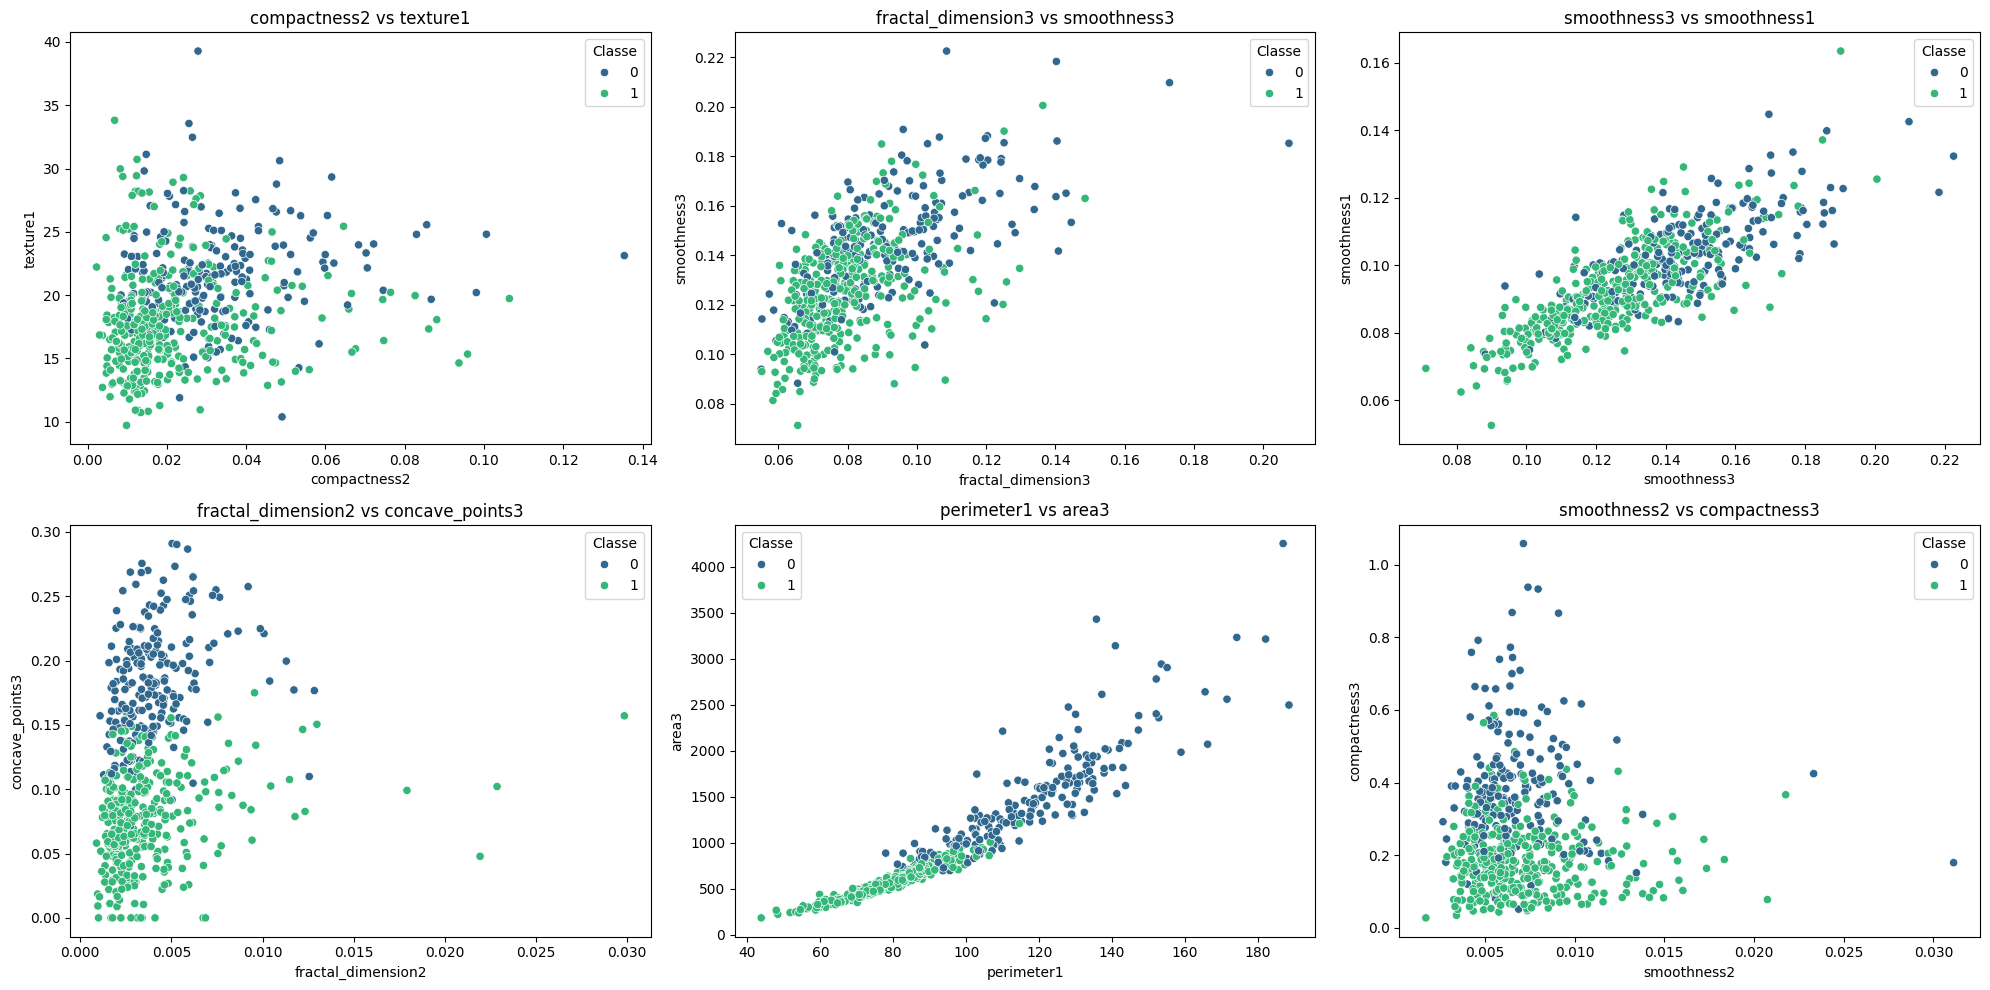

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'breast' seja o DataFrame contendo seus dados
# Calcular a matriz de correlação
corr_matrix = breast.drop(columns=["target"]).corr()

# Encontrar todos os pares de índices (variáveis)
pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if i != j]
np.random.shuffle(pairs)

# Selecionar 6 pares aleatórios
random_pairs = pairs[:6]

# Configurar os subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plotar os gráficos de pares aleatórios
for i, (x_column, y_column) in enumerate(random_pairs):
    ax = axes[i // 3, i % 3]
    sns.scatterplot(ax=ax, x=breast[x_column], y=breast[y_column], hue=breast['target'], palette='viridis')
    ax.set_title(f'{x_column} vs {y_column}')
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.legend(title='Classe')

# Ajustar layout
plt.tight_layout()
plt.savefig("amostras.png", dpi=300)
plt.show()


In [13]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn import metrics

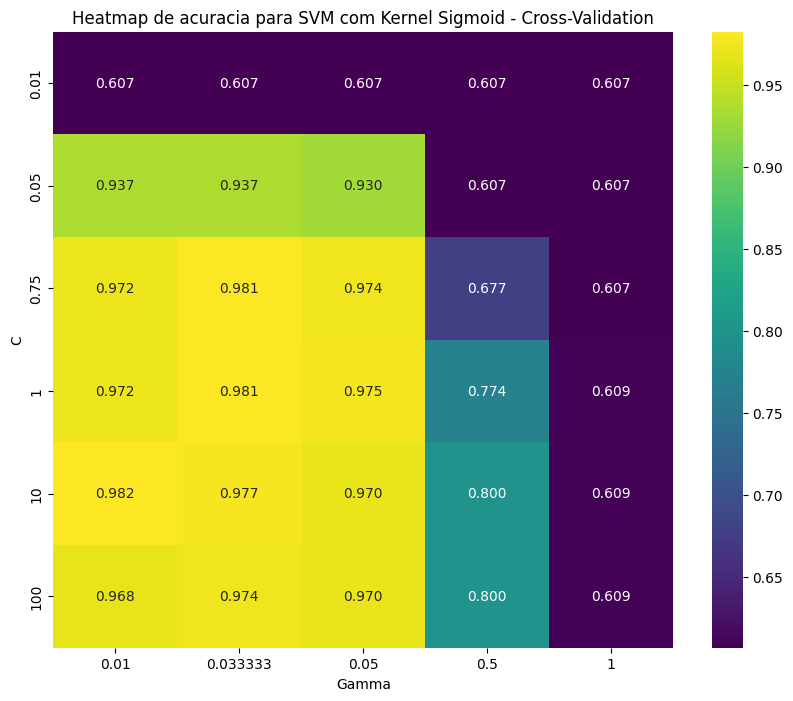

In [ ]:
# Definir os parâmetros de C e gamma
C_values = [0.01, 0.05, 0.75, 1, 10, 100]
gamma_values = [0.01, 0.033333,0.05, 0.5, 1]

# Criar uma matriz para armazenar as médias das acurácias
accuracy_matrix = np.zeros((len(C_values), len(gamma_values)))

# Configurar k-fold cross-validation
k = 5
rs = ShuffleSplit(n_splits=k, test_size=0.2, random_state=0)

# Normalizador
scaler = StandardScaler()

# Treinar o modelo para cada combinação de C e gamma e armazenar a média das acurácias
for i, C in enumerate(C_values):
    for j, g in enumerate(gamma_values):
        acc_scores = []
        for o, (train_index, test_index) in enumerate(rs.split(X)):

            X_train , X_test = X.values[train_index],X.values[test_index]
            y_train , y_test = y.values[train_index].flatten() , y.values[test_index].flatten()

            # Normalizar os dados
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Treinar o modelo
            model = svm.SVC(C=C, kernel='rbf', gamma=g)

            model.fit(X_train, y_train)

            # Fazer previsões e calcular a acurácia
            preds = model.predict(X_test)
            acc = metrics.accuracy_score(preds, y_test)
            acc_scores.append(acc)


        # Calcular a média das acurácias
        avg_acc_score = np.mean(acc_scores)
        # print(avg_acc_score)
        accuracy_matrix[i, j] = avg_acc_score

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_matrix, annot=True, xticklabels=gamma_values, yticklabels=C_values, cmap="viridis",fmt=".3f")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Heatmap de acuracia para SVM com Kernel Sigmoid - Cross-Validation")
plt.savefig("sigmoid_brests.png", dpi=300)
plt.show()

Aplicação Pytorch


In [ ]:

import torch
from torch import nn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_test = y_test.values.flatten()
y_train = y_train.values.flatten()
# print(X_train)
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([455, 30]),
 torch.Size([114, 30]),
 torch.Size([455]),
 torch.Size([114]))

In [ ]:


class MLPV0(nn.Module):
  def __init__(self,
               input_size = 30,
            hiden_layers = 64,
            output_size = 1):
    super().__init__()
    self.linear_RELU = nn.Sequential(
                nn.Linear(input_size, hiden_layers),
                nn.ReLU(),
                nn.Linear(hiden_layers, hiden_layers),
                nn.ReLU(),
                nn.Linear(hiden_layers, output_size),
                # nn.Sigmoid()
            )

  def forward(self,x):
    # return torch.round(self.linear_RELU(x))
    return self.linear_RELU(x)


def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item() #torch.eq -> how many samples are equal
    acc = (correct/len(y_pred)) * 100
    return acc

def train(model,
          learning_rate,
          X_train,
          y_train,
          x_test,
          y_test,
          epochs = 200):
  # Loss and optimizer
  criterion = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(model.parameters(),
                              lr=learning_rate)

  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))


    loss = criterion(y_logits, y_train)
    train_losses[epoch] = loss.item()
    acc = accuracy_fn(y_train,y_pred)
    # Backpropagation

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
    #Train loss
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      test_loss = criterion(test_logits, y_test)
      test_acc = accuracy_fn(y_test,test_pred)

      test_losses[epoch] = test_loss.item()

      if epoch % 100 == 0:

            print(f"Epoch: {epoch} | Train Loss: {loss:5f} | Acc: {acc:5f}% | Test Loss:{test_loss:2f} | Test acc:{test_acc:2f}%" )


  return train_losses, test_losses

Epoch: 0 | Train Loss: 0.702469 | Acc: 35.384615% | Test Loss:0.680113 | Test acc:48.245614%
Epoch: 100 | Train Loss: 0.076176 | Acc: 98.461538% | Test Loss:0.090584 | Test acc:95.614035%
Epoch: 200 | Train Loss: 0.052482 | Acc: 98.901099% | Test Loss:0.070714 | Test acc:95.614035%
Epoch: 300 | Train Loss: 0.042124 | Acc: 99.120879% | Test Loss:0.068619 | Test acc:95.614035%
Epoch: 0 | Train Loss: 0.712628 | Acc: 47.692308% | Test Loss:0.702706 | Test acc:54.385965%
Epoch: 100 | Train Loss: 0.083912 | Acc: 97.582418% | Test Loss:0.067085 | Test acc:99.122807%
Epoch: 200 | Train Loss: 0.059303 | Acc: 98.461538% | Test Loss:0.042368 | Test acc:99.122807%
Epoch: 300 | Train Loss: 0.048217 | Acc: 98.901099% | Test Loss:0.035159 | Test acc:99.122807%
Epoch: 0 | Train Loss: 0.705788 | Acc: 35.824176% | Test Loss:0.688318 | Test acc:53.508772%
Epoch: 100 | Train Loss: 0.081100 | Acc: 98.241758% | Test Loss:0.074934 | Test acc:98.245614%
Epoch: 200 | Train Loss: 0.052885 | Acc: 99.120879% | Te

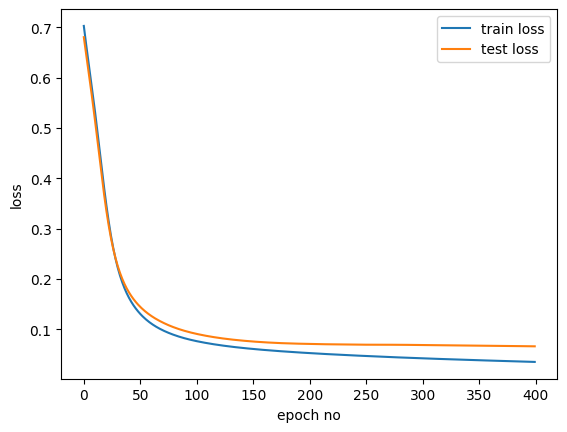

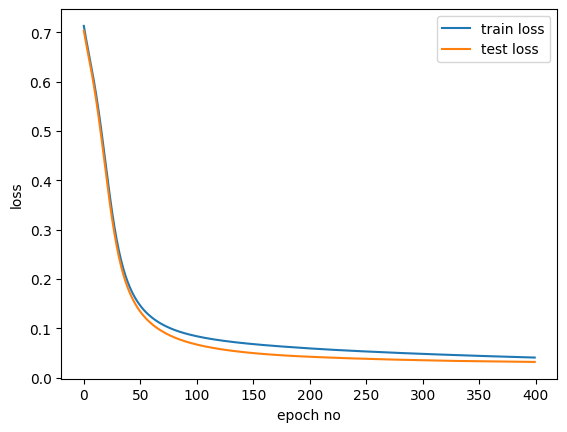

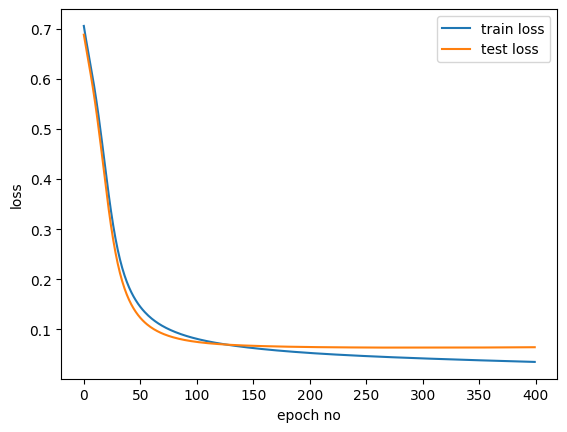

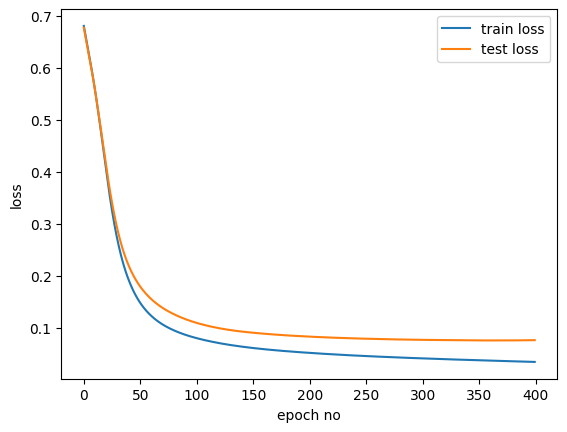

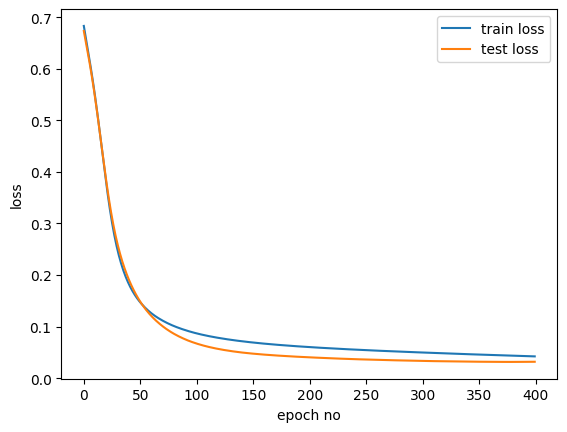

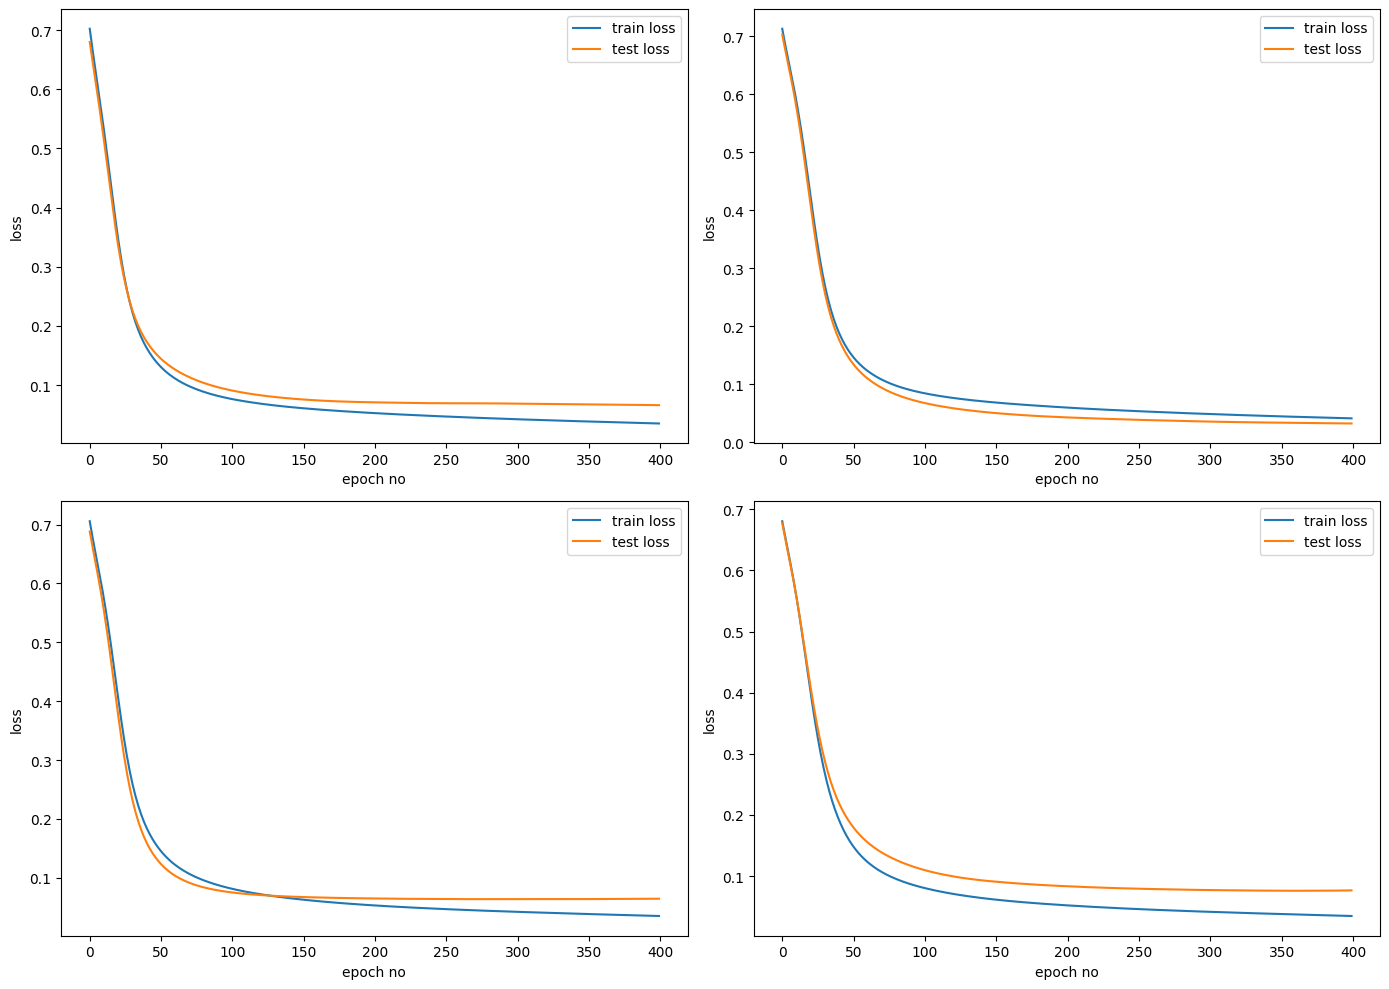

In [ ]:
k = 5
rs = ShuffleSplit(n_splits=k, test_size=0.2, random_state=0)
acc_scores = []
figures = []
for o, (train_index, test_index) in enumerate(rs.split(X)):

            X_train , X_test = X.values[train_index],X.values[test_index]
            y_train , y_test = y.values[train_index].flatten() , y.values[test_index].flatten()

            # Normalizar os dados
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            X_train = torch.from_numpy(X_train.astype(np.float32))
            y_train = torch.from_numpy(y_train.astype(np.float32))
            X_test = torch.from_numpy(X_test.astype(np.float32))
            y_test = torch.from_numpy(y_test.astype(np.float32))
            # Treinar o modelo

            model = MLPV0()
            lr = 0.1
            epochs = 400
            train_losses, test_losses = train(model,
                                              lr,
                                              X_train,
                                              y_train,
                                              X_test,
                                              y_test,
                                              epochs)
            fig, ax = plt.subplots()
            plt.plot(train_losses, label='train loss')
            plt.plot(test_losses, label='test loss')
            plt.xlabel('epoch no')
            plt.ylabel('loss')
            plt.legend()
            figures.append(fig)
            # plt.savefig("erro.png", dpi=300)
            # plt.show()
            # Fazer previsões e calcular a acurácia
            preds = torch.round(torch.sigmoid(model(X_test).squeeze())).detach().numpy()
            acc = metrics.accuracy_score(preds, y_test)

            acc_scores.append(acc)
avg_acc_score = np.mean(acc_scores)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Adicionar cada gráfico individual como um subplot
for i, ax in enumerate(axs.flat):
    fig_i = figures[i]
    for line in fig_i.axes[0].get_lines():
        ax.plot(line.get_xdata(), line.get_ydata(), label=line.get_label())
    ax.set_xlabel('epoch no')
    ax.set_ylabel('loss')
    ax.legend()

plt.tight_layout()
plt.savefig("combined_fig.png", dpi=300)
plt.show()



In [ ]:
avg_acc_score

0.9789473684210528